# ARUCO markers: basics

## 1:  Marker creation

In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

<IPython.core.display.Javascript object>


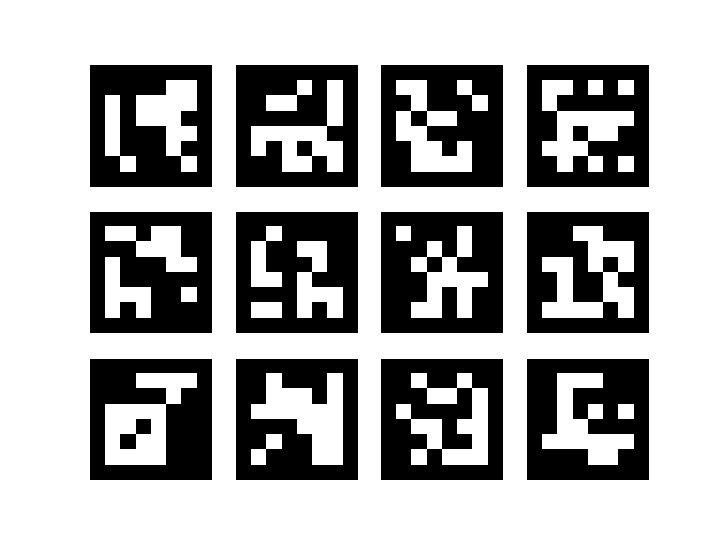

In [2]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.generateImageMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers.pdf")    
plt.show()

## 2: Print, cut, stick and take a picture

<IPython.core.display.Javascript object>


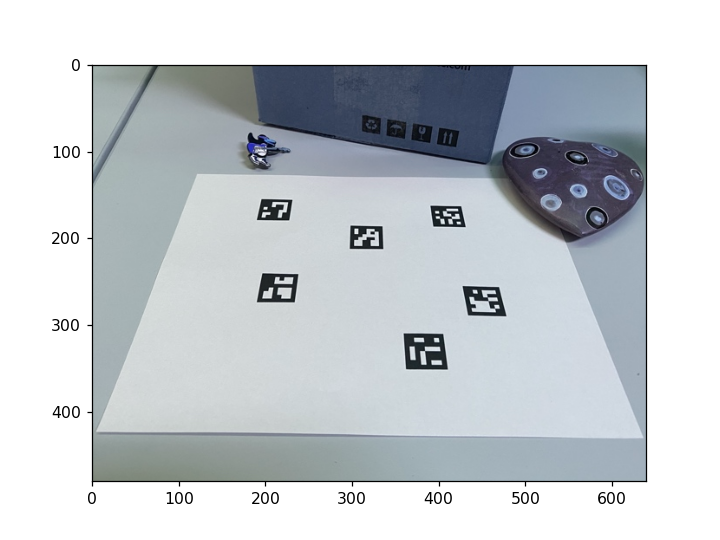

In [3]:
frame = cv2.imread("cuadros.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

## 3: Post processing

In [4]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters()
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

CPU times: total: 0 ns
Wall time: 59.8 ms


Pretty fast processing !

## 4: Results

<IPython.core.display.Javascript object>


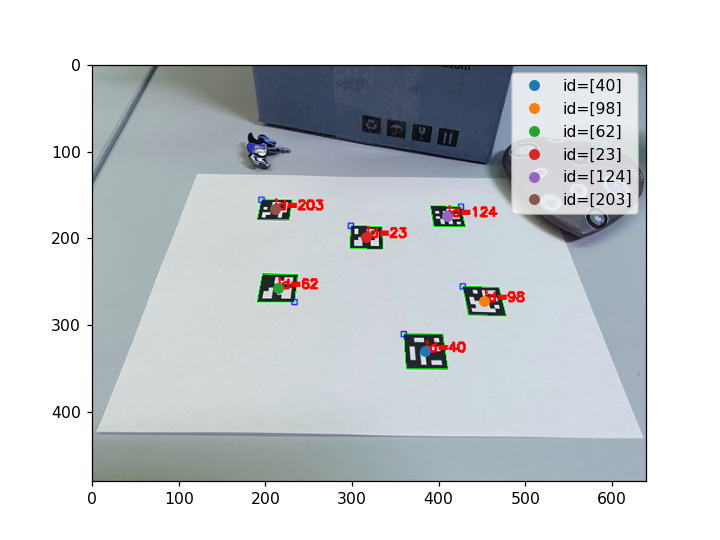

In [5]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [6]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1     c2     c3     c4     m1     m2     m3     m4       o
marker                                                                  
23     x  298.0  334.0  335.0  297.0  316.0  334.5  316.0  297.5  316.00
       y  185.0  186.0  212.0  211.0  185.5  199.0  211.5  198.0  198.50
40     x  359.0  404.0  410.0  362.0  381.5  407.0  386.0  360.5  383.75
       y  310.0  310.0  350.0  350.0  310.0  330.0  350.0  330.0  330.00
62     x  233.0  190.0  196.0  237.0  211.5  193.0  216.5  235.0  214.00
       y  273.0  273.0  241.0  241.0  273.0  257.0  241.0  257.0  257.00
98     x  427.0  469.0  477.0  434.0  448.0  473.0  455.5  430.5  451.75
       y  255.0  256.0  289.0  288.0  255.5  272.5  288.5  271.5  272.00
124    x  425.0  430.0  394.0  390.0  427.5  412.0  392.0  407.5  409.75
       y  163.0  186.0  186.0  162.0  174.5  186.0  174.0  162.5  174.25
203    x  195.0  230.0  227.0  190.0  212.5  228.5  208.5  192.5  210.50
       y  155.0  155.0  178.0  178.0  155.0  166.5  178.0  166.5  166.50